1、安装扩散器库

## 预训练扩散管道：
    diffusers提供了一些最先进的扩散管道，只需几行代码即可进行推理。这些管道涵盖了多种任务，如图像生成、音频生成等## 

可互换的噪声调度
    程序：库中包含了多种噪声调度程序，这些调度程序可以互换使用，以便在生成速度和质量之间取
    调度程序类型：

常见的噪声调度程序包括线性调度程序、DDIM（Denoising Diffusion Implicit Models）、DDPM（Denoising Diffusion Probabilistic Models）等，它们各自有不同的噪声添加和移除策略。## 
。


    预训练模型：diffusers提供了多种类型的预训练模型，如UNet，这些模型可以作为构建块，与调度程序结合使用，创建自己的端散## 系统
。
    

训练示例：diffusers提供了训练最受欢迎的扩散模型任务的示例，帮助用户学习如何己## 的扩散模型

    。

模块化工具箱：diffusers旨在作为一个模块化的工具箱，于## 推理也适
    用于训练
。

易用性：diffusers的设计注重易用性，模型默认以最高精度和最低优化加载，确同## 平台和加速
    器上的可用性
。

轻量级包：diffusers力求成为一个轻量级的包，只有很少的必需依但## 有许多可以提
    高性能的软依赖项
。

代码简洁性：diffusers倾向于使用简单释## 的代码，而不是简洁的、
    魔法般的代码
。

可定制性和贡献者友好：diffusers更倾向于可定制性、贡献者友好而不是抽象，它提供了、## 基础的构建块
    ，而不是将所有内容封装在一起
。

多模态独立：diffusers是多模态独立的，专注于提供预训练模型和工具来构建生成连续输出的系统，例如视觉和音频


2、下载数据集

3、定义调度程序：
    为输入图片添加噪声、将噪声图片输入模型中。在推理过程中，使用模型预测迭代地去除噪声

4、定义模型：
    Unet：下采样+中间层+上采样(ResNet层，图像大小减半，内含跳转连接结构)，预测与输入相同大小的图片
    U-Net 可以被调整和扩展以适应不同的图像识别任务，例如通过修改网络的深度、宽度或跳跃连接的方式。
    ResNet：即残差网络（Residual Network），是一种用于图像识别和其他视觉任务的深度卷积神经网络，它通过引入残差学习框架来解决深度网络训练中的退化问题。

In [1]:
from diffusers import UNet2DModel

ModuleNotFoundError: No module named 'diffusers'

处理更高分辨率的输入时，您可能需要使用更多的向下和向上块，并将注意力层仅保持在最低分辨率（底部）层以减少内存使用量。

5、创建训练循环（训练模型/优化模型参数）
    对于每一批数据，我们：
        
采样一些随机时间步        长
相应地对数据进行噪声        处理
将噪声数据输        入模型
使用均方误差作为损失函数，将模型预测与目标（即本例中的噪声）        进行比较
loss.backward()通过和更新模型参数optimizer.
    （在此过程中，我们还会记录一段时间内的损失，以供日后绘制图表。）step()

6、生成图像

## 开始

In [1]:
"""
diffusers库：是Hugging Face公司开发的一款用于各种生成模型的库。
"""
%pip install -q diffusers

Note: you may need to restart the kernel to use updated packages.


In [2]:
"""
导入库：
    torch 是 PyTorch 的核心库，提供了张量操作、自动微分等功能。
    nn 是 PyTorch 的神经网络模块，包含了构建神经网络所需的类和函数。
    F 是 PyTorch 的函数式接口，提供了一些常用的神经网络函数，如激活函数和损失函数。
    DataLoader 是 PyTorch 中用于加载数据集的类，它可以批量地、随机地加载数据，并且支持多线程加载。
    DDPMScheduler 是一个调度器，用于控制扩散模型中的噪声添加和去除过程。
    UNet2DModel 是一个2D U-Net 模型，常用于图像生成和处理任务。
    plt 是 Matplotlib 的 pyplot 模块，用于绘制图表和图像。
    torch.device 用于指定计算设备，如果系统支持 CUDA（即有 NVIDIA GPU），则使用 GPU 进行计算，否则使用 CPU。
"""
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, UNet2DModel
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cpu


In [3]:
"""
mnist数据集：
"""
dataset = torchvision.datasets.MNIST(r"C:\Users\honor\Desktop\Python入门\模型\ddpm\data",
                                     train=True, 
                                     download=False, 
                                     transform=torchvision.transforms.ToTensor())
print(dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

Input shape: torch.Size([8, 1, 28, 28])
Labels: tensor([5, 5, 0, 5, 3, 2, 5, 9])


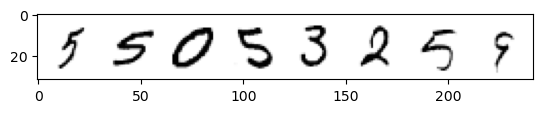

In [4]:
"""
    数据集可视化：
    使用 PyTorch 的 DataLoader 类来创建一个数据加载器，它负责在训练过程中将数据批量地、随机地加载到模型中。
    batch_size=8：指定每个批次的大小为8，意味着每次迭代将从数据集中加载8个样本。
    shuffle=True：设置为 True 表示在每个epoch开始时，数据集中的样本将被打乱。这有助于模型训练时的泛化能力，因为它确保了模型不会记住特定顺序的样本。
    DataLoader 对象 train_dataloader 将被用于训练循环中，通过迭代它来获取批次数据，并将这些数据输入到模型中进行训练。
每次迭代时，DataLoader 会从 dataset 中取出一个批次的数据，并将其打包成一个批次，然后你可以在模型中使用这些数据进行前向传播、计算损失、反向传播和参数更新。
"""
train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

x, y = next(iter(train_dataloader)) #x 和 y 分别存储这批数据的输入图像和对应的标签。
print('Input shape:', x.shape)
print('Labels:', y)
plt.imshow(torchvision.utils.make_grid(x)[0], cmap='Greys'); #将批次中的所有图像拼接成一个大图像

Input shape: torch.Size([8, 1, 28, 28])
Labels: tensor([8, 5, 0, 7, 6, 6, 9, 5])


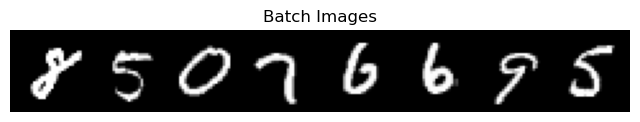

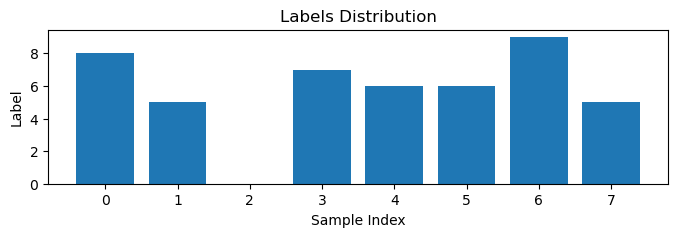

In [5]:
"""
    （同上）数据集可视化：
    matplotlib 是一个用于创建静态、交互式和动画可视化的Python库
    pyplot 是 matplotlib 的一个模块，它提供了一个类似于 MATLAB 的绘图框架
    torchvision 是 PyTorch 的一个库，提供了处理图像和视频的常用工具和数据集。
    utils 模块包含了一些额外的工具和实用函数，例如 make_grid，这个函数可以将多个图像拼接成一个网格，便于同时展示多个图像。
    make_grid 函数通常用于将一批图像组合成单个图像，这样可以在一张图上展示多个图像，方便比较和展示
"""
import matplotlib.pyplot as plt
import torchvision.utils

# 获取一批数据
x, y = next(iter(train_dataloader))

# 打印输入图像的形状
print('Input shape:', x.shape)

# 打印标签
print('Labels:', y)

# 显示图像
grid = torchvision.utils.make_grid(x)
plt.figure(figsize=(8, 8))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.title('Batch Images')
plt.axis('off')
plt.show()

# 显示标签
plt.figure(figsize=(8, 2))
plt.bar(range(len(y)), y)
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Labels Distribution')
plt.show()

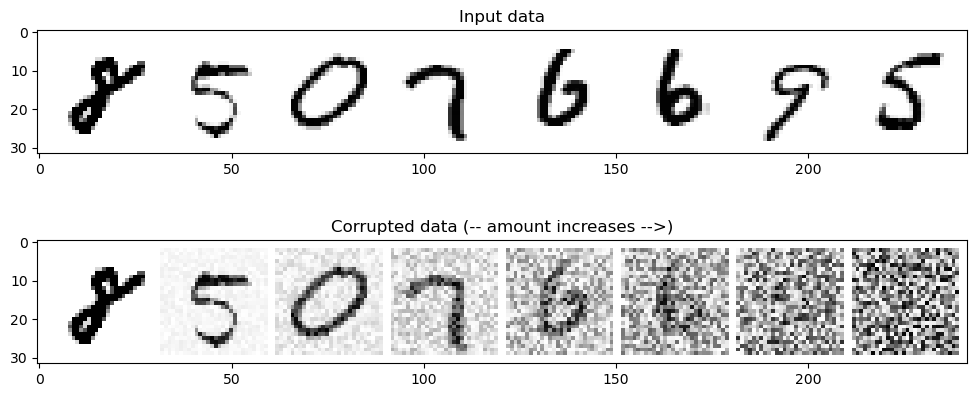

In [6]:
"""
扩散过程：
    amount为控制噪声的比例，x为输入原图
"""
amount = 0
noise = torch.rand_like(x) #生成一个与 x 形状相同的随机噪声张量
noisy_x = (1-amount)*x + amount*noise

#输入x和扩散量，返回原图x与噪声混合结果
def corrupt(x, amount):
  noise = torch.rand_like(x)
  amount = amount.view(-1, 1, 1, 1) # 调整 amount 的形状，使其可以与 x 进行广播操作ks
  return x*(1-amount) + noise*amount 

"""
Adding noise
生成一个从0到1的线性间隔的张量，长度等于 x 的批次大小，从左到右逐渐增加。
"""
amount = torch.linspace(0, 1, x.shape[0]) # Left to right -> more corruption
noised_x = corrupt(x, amount)

# 可视化输入图像
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
axs[0].set_title('Input data')
axs[0].imshow(torchvision.utils.make_grid(x)[0], cmap='Greys')
# 可视化添加噪声的图像
axs[1].set_title('Corrupted data (-- amount increases -->)')
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0], cmap='Greys');

In [7]:
"""
    BasicUNet模型：
    A minimal Unet模型：允许它接收一个28x28像素的图像
    通过下采样提取特征，然后通过上采样重建图像，最终输出一个与输入相同尺寸的图像。
    定义了一个名为 BasicUNet 的类，它继承自 nn.Module，是 PyTorch 中所有神经网络模型的基类
    下采样层：3个卷积层
"""
class BasicUNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        self.down_layers = torch.nn.ModuleList([ #下采样层：三层卷积
            nn.Conv2d(in_channels, 32, kernel_size=5, padding=2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
        ])
        self.up_layers = torch.nn.ModuleList([ #上采样层：三层卷积
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
            nn.Conv2d(64, 32, kernel_size=5, padding=2),
            nn.Conv2d(32, out_channels, kernel_size=5, padding=2), 
        ])
        self.act = nn.SiLU() # 激活函数：SiLU（Sigmoid Linear Unit）
        self.downscale = nn.MaxPool2d(2) #最大池化进行下采样
        self.upscale = nn.Upsample(scale_factor=2) #上采样，放大因子为2
    """
    前向传播：
    初始化一个空列表 h，用于存储下采样过程中的特征图，以便后续在上采样过程中使用
    遍历下采样层，对每个层应用卷积和激活函数，除了最后一层外，每层的输出都被存储在 h 列表中，并进行下采样
    遍历上采样层，对每个层应用上采样、跳跃连接（将下采样过程中存储的特征图加回来）和激活函数
    """
    def forward(self, x):
        h = [] 
        #遍历下采样
        for i, l in enumerate(self.down_layers):
            x = self.act(l(x)) # Through the layer and the activation function
            if i < 2: # For all but the third (final) down layer:
              h.append(x) # Storing output for skip connection
              x = self.downscale(x) # Downscale ready for the next layer
        #遍历上采样    
        for i, l in enumerate(self.up_layers):
            if i > 0: # For all except the first up layer
              x = self.upscale(x) # Upscale
              x += h.pop() # Fetching stored output (skip connection)
            x = self.act(l(x)) # Through the layer and the activation function
            
        return x

#验证输出图像大小
net = BasicUNet()
x = torch.rand(8, 1, 28, 28)
net(x).shape

torch.Size([8, 1, 28, 28])

In [8]:
#打印模型参数
sum([p.numel() for p in net.parameters()])

309057

Finished epoch 0. Average loss for this epoch: 0.024748


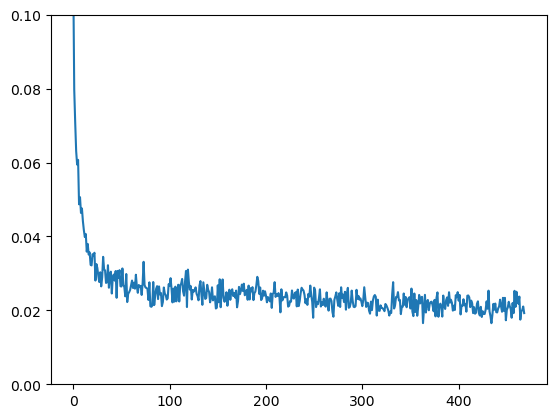

In [9]:
"""
    训练网络：
    给定一个损坏的输入 noisy_x，模型应该输出对原始 x 的最佳猜测。我们将通过均方误差将其与实际值进行比较。
获取一批数据
用随机数量破坏它
将其送入模型
将模型预测与干净的图像进行比较以计算我们的损失
相应地更新模型的参数。
"""
# Dataloader (you can mess with batch size)
batch_size = 128 #每个批次包含128个样本
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# How many runs through the data should we do?
#训练的轮数（epochs），即整个数据集将被遍历多少次。这里设置了3个epochs
n_epochs = 1

# Create the network
net = BasicUNet()
net.to(device)

# Our loss function
#定义了损失函数，使用 PyTorch 的 MSELoss，它计算预测值和真实值之间的均方误差。
loss_fn = nn.MSELoss()

# The optimizer
#定义了优化器，使用 Adam 算法，学习率设置为0.001。优化器用于在训练过程中更新模型的参数
opt = torch.optim.Adam(net.parameters(), lr=1e-3) 

# Keeping a record of the losses for later viewing
#初始化了一个空列表 losses，用于存储每个批次的损失值，以便后续分析和可视化。
losses = []
"""
The training loop:
    循环开始了训练过程，它将遍历每个epoch。range(n_epochs) 生成一个从0到 n_epochs-1 的序列
    遍历 train_dataloader 中的每个批次。x 是图像数据，y 是对应的标签，本例中我们只关心图像数据 x
    为批次中的每个样本生成一个随机的噪声量，并将这些噪声量移动到指定的设备
    使用 corrupt 函数将随机噪声添加到数据 x 中，创建损坏的版本 noisy_x
    将加噪数据 noisy_x 输入到模型 net 中，得到模型的预测 pred
    计算模型预测 pred 和原始数据 x 之间的均方误差损失
    opt.zero_grad() 清空之前的梯度。
    loss.backward() 计算损失相对于模型参数的梯度。
    opt.step() 根据梯度更新模型的参数。
    将当前批次的损失值添加到 losses 列表中，以便后续分析
"""
for epoch in range(n_epochs):

    for x, y in train_dataloader:

        # Get some data and prepare the corrupted version
        x = x.to(device) # Data on the GPU
        noise_amount = torch.rand(x.shape[0]).to(device) # Pick random noise amounts
        noisy_x = corrupt(x, noise_amount) # Create our noisy x

        # Get the model prediction
        pred = net(noisy_x)

        # Calculate the loss
        loss = loss_fn(pred, x) # How close is the output to the true 'clean' x?

        # Backprop and update the params:
        opt.zero_grad()
        loss.backward()
        opt.step()

        # Store the loss for later
        losses.append(loss.item())

    # Print our the average of the loss values for this epoch:
    avg_loss = sum(losses[-len(train_dataloader):])/len(train_dataloader)
    print(f'Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}')

# View the loss curve
plt.plot(losses)
plt.ylim(0, 0.1);

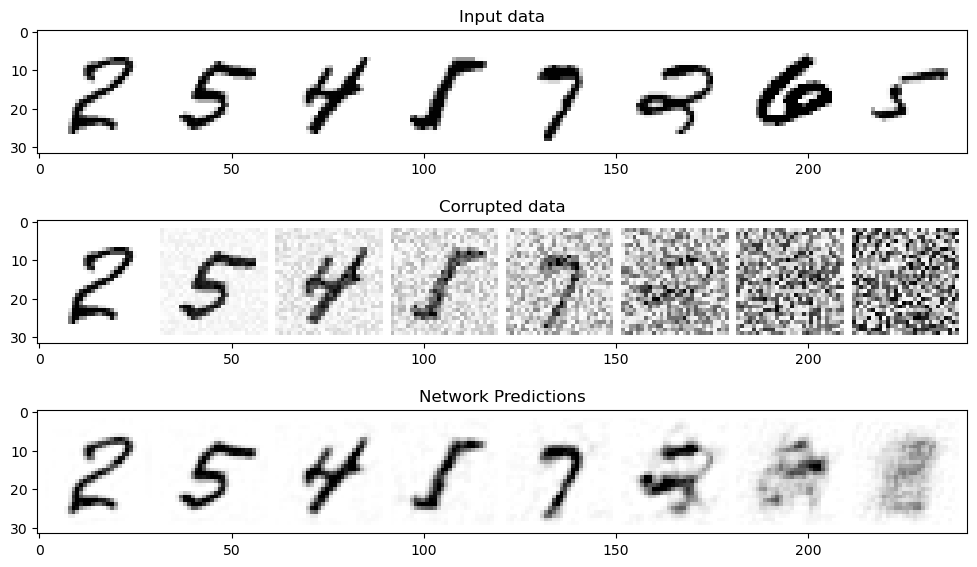

In [10]:
"""
对噪声输入的模型预测进行可视化
"""
# Fetch some data
x, y = next(iter(train_dataloader))
x = x[:8] # Only using the first 8 for easy plotting

# Corrupt with a range of amounts
#创建一个从0到1的线性间隔的张量 amount，长度等于 x 的批次大小，表示噪声量从无到有
amount = torch.linspace(0, 1, x.shape[0]) # Left to right -> more corruption
noised_x = corrupt(x, amount)

# Get the model predictions
#获取模型预测
with torch.no_grad():
  preds = net(noised_x.to(device)).detach().cpu()

# Plot
#torchvision.utils.make_grid 函数将多个图像拼接成一个大图像，方便可视化
fig, axs = plt.subplots(3, 1, figsize=(12, 7))
axs[0].set_title('Input data')
axs[0].imshow(torchvision.utils.make_grid(x)[0].clip(0, 1), cmap='Greys')
axs[1].set_title('Corrupted data')
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0].clip(0, 1), cmap='Greys')
axs[2].set_title('Network Predictions')
axs[2].imshow(torchvision.utils.make_grid(preds)[0].clip(0, 1), cmap='Greys');

？噪声强度越大，越不能预测到结果（amount从0~1）

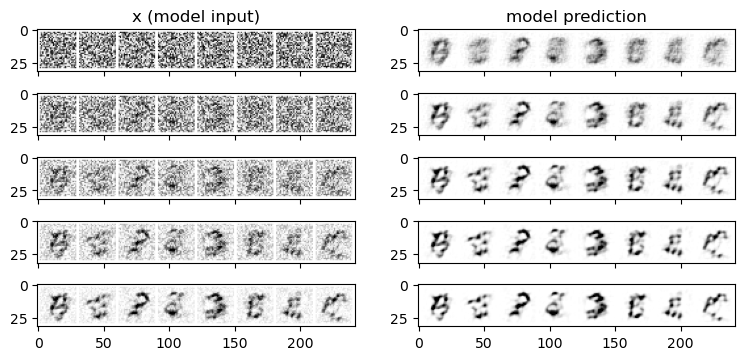

In [11]:
"""
    采样：
    将过程分为 5 个步骤，每次移动 1/5 的距离
"""
n_steps = 5
x = torch.rand(8, 1, 28, 28).to(device) # Start from random
step_history = [x.detach().cpu()]
pred_output_history = []
#循环 n_steps 次，每次迭代都是一个采样步骤
for i in range(n_steps):
    with torch.no_grad(): # No need to track gradients during inference
        pred = net(x) # Predict the denoised x0
    pred_output_history.append(pred.detach().cpu()) #将模型的预测输出添加到 pred_output_history 中
    mix_factor = 1/(n_steps - i) #计算混合因子 mix_factor，它决定了在每一步中向模型预测靠近的程度
    x = x*(1-mix_factor) + pred*mix_factor #更新 x，使其部分地向模型预测靠近
    step_history.append(x.detach().cpu()) # Store step for plotting

fig, axs = plt.subplots(n_steps, 2, figsize=(9, 4), sharex=True)
axs[0,0].set_title('x (model input)')
axs[0,1].set_title('model prediction')
for i in range(n_steps):
    axs[i, 0].imshow(torchvision.utils.make_grid(step_history[i])[0].clip(0, 1), cmap='Greys')
    axs[i, 1].imshow(torchvision.utils.make_grid(pred_output_history[i])[0].clip(0, 1), cmap='Greys')

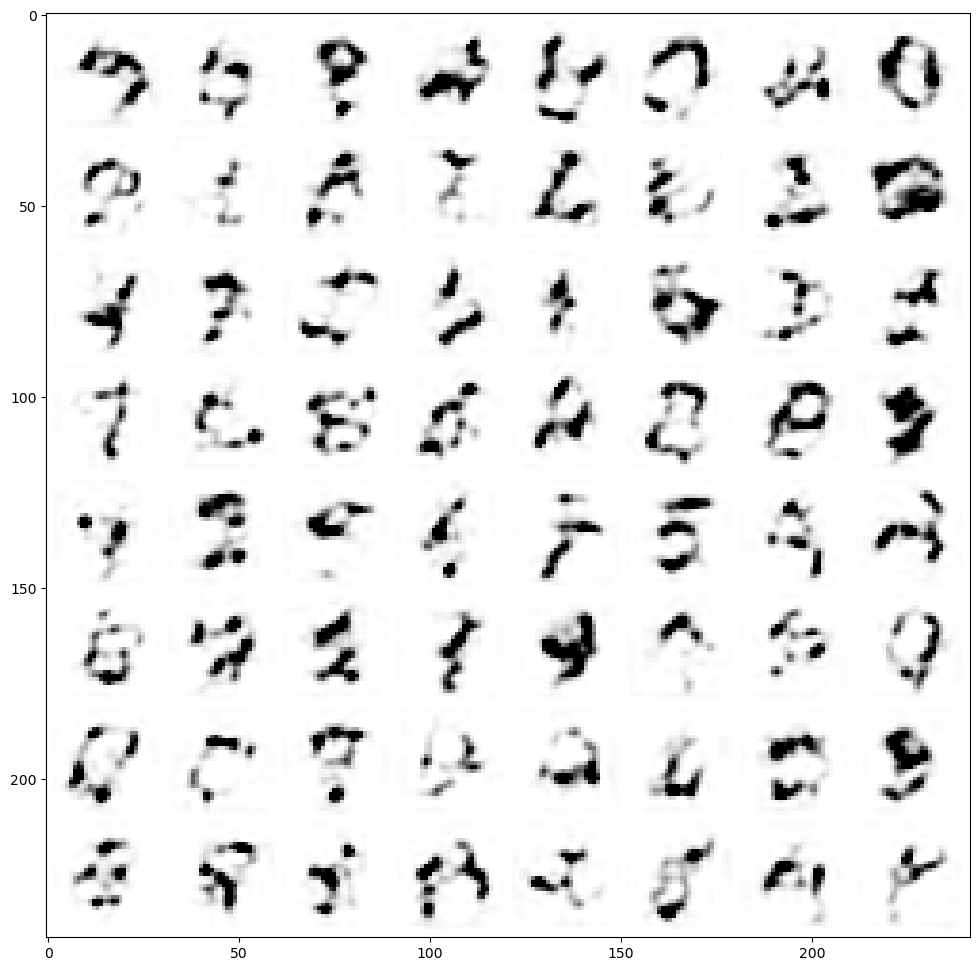

In [12]:
"""
    同上：
使用 40 个采样步骤显示更多结果
"""
n_steps = 40
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
  noise_amount = torch.ones((x.shape[0], )).to(device) * (1-(i/n_steps)) # Starting high going low
  with torch.no_grad():
    pred = net(x)
  mix_factor = 1/(n_steps - i)
  x = x*(1-mix_factor) + pred*mix_factor
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1), cmap='Greys')

1、预测效果不好，或者可以选择更长的训练时间，epoches=10/20，调整模型配置，学习率，优化器...或者更难的数据集FashionMNIST数据集
2、扩散器UNet2DModel比我们的 BasicUNet 更先进一些
腐败过程的处理方式不同
训练目标不同，涉及预测噪声而不是去噪图像
该模型通过时间步长条件来调节存在的噪声量，其中 t 作为附加参数传递给前向方法。
有多种不同的采样策略可供选择，它们应该比我们上面的简单版本效
3、Unet2的改进：
GroupNorm 将组规范化应用于每个块的输入
去除层以实现更顺畅的训练
每个块有多个 resnet 层（如果 layer_per_block 未设置为 1）
注意（通常仅在较低分辨率块中使用）
根据时间步长进行调节。
具有可学习参数的下采样
4、训练目标：

5、时间步长调节：
UNet2DModel接受 x 和时间步（time_steps转换为嵌入，并在多个位置输入到模型中）
通过向模型提供有关噪声水平的信息，它可以更好地执行任务。虽然可以在没有这种时间步长条件的情况下训练模型，但它在某些情况下似乎有助于提高性能
6、采样：
    给定一个估计噪声输入中存在的噪声（或预测去噪版本）的模型，我们如何生成新的图像？
根据模型预测采取一些较小的步骤，每次迭代地去除一点噪声:
  你应该采取多大的措施？换句话说，你应该遵循什么样的“噪音时间表”？    
您是否仅使用模型的当前预测来通知更新步骤（如 DDPM、DDIM 和许多其他方法）？您是否多次评估模型以估计更大、更准确的步骤的高阶梯度（高阶方法和一些离散 O​​DE 求解器）？或者您是否保留过去预测的历史记录以尝试更好地通知当前更新步骤（线性多步骤和祖先采样器）？    
您是否会添加额外的噪音（有时称为搅动）来为采样过程增加更多随机性（随机性），还是保持其完全确定性？许多采样器使用参数（例如 DDIM 采样器的“eta”）来控制这一点，以便用户可以选择。  和上采样块果更好。

In [13]:
model = UNet2DModel(
    sample_size=28,           # the target image resolution
    in_channels=1,            # the number of input channels, 3 for RGB images
    out_channels=1,           # the number of output channels
    layers_per_block=2,       #每个UNet块中使用的ResNet层数。每个块中有2个卷积层
    block_out_channels=(32, 64, 64), #UNet中每个块的输出通道数
    down_block_types=( 
        "DownBlock2D",        #常规的ResNet下采样块
        "AttnDownBlock2D",    #带有空间自注意力的ResNet下采样块
        "AttnDownBlock2D",
    ), 
    up_block_types=(
        "AttnUpBlock2D", 
        "AttnUpBlock2D",      # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",          # a regular ResNet upsampling block
      ),
)
print(model)

UNet2DModel(
  (conv_in): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=32, out_features=128, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=128, out_features=128, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 32, eps=1e-05, affine=True)
          (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=128, out_features=32, bias=True)
          (norm2): GroupNorm(32, 32, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(32, 32, ker

In [14]:
#模型参数
sum([p.numel() for p in model.parameters()]) # 1.7M vs the ~309k parameters of the BasicUNet

1707009

In [ ]:
"""
    UNet2DModel模型：深度学习模型进行训练，以及如何可视化训练过程中的损失和生成的样本
    
"""
# Dataloader (you can mess with batch size)
batch_size = 128
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)#shuffle在每个epoch开始时随机打乱数据次序

#训练过程中数据集将被遍历的次数为3
n_epochs = 1

# Create the network
net = UNet2DModel(
    sample_size=28,  # the target image resolution
    in_channels=1,  # the number of input channels, 3 for RGB images
    out_channels=1,  # the number of output channels
    layers_per_block=2,  # 指定每个UNet块中使用的ResNet层数
    block_out_channels=(32, 64, 64),  # 指定每个块的输出通道数
    down_block_types=( 
        "DownBlock2D",  # a regular ResNet downsampling block
        "AttnDownBlock2D",  # 常规的ResNet块和带有空间自注意力的块
        "AttnDownBlock2D",
    ), 
    up_block_types=(
        "AttnUpBlock2D", 
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",   # a regular ResNet upsampling block
      ),
) #<<<
net.to(device)

# Our loss finction
loss_fn = nn.MSELoss()

# The optimizer
opt = torch.optim.Adam(net.parameters(), lr=1e-3) 

# Keeping a record of the losses for later viewing
losses = []

# 训练循环
for epoch in range(n_epochs):

    for x, y in train_dataloader:
        
        # Get some data and prepare the corrupted version
        x = x.to(device) # Data on the GPU
        noise_amount = torch.rand(x.shape[0]).to(device) # 为每个样本生成随机的噪声量
        noisy_x = corrupt(x, noise_amount) # Create our noisy x

        # 使用模型对损坏的输入进行预测
        pred = net(noisy_x, 0).sample #<<< Using timestep 0 always, adding .sample

        #计算预测结果与原始数据之间的MSE损失
        loss = loss_fn(pred, x) # How close is the output to the true 'clean' x?

        # Backprop and update the params:
        #清空梯度，执行反向传播，更新模型参数
        opt.zero_grad()
        loss.backward()
        opt.step()

        # Store the loss for later
        losses.append(loss.item())

    # Print our the average of the loss values for this epoch:
    avg_loss = sum(losses[-len(train_dataloader):])/len(train_dataloader)
    print(f'Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}')

# Plot losses and some samples
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Losses可视化化
axs[0].plot(losses)
axs[0].set_ylim(0, 0.1)
axs[0].set_title('Loss over time')

"""
    Samples:
    设置采样步骤的数量为40。
    创建一个随机初始化的噪声图像 x，并将其移动到指定的设备。
    通过逐步减少噪声量来生成样本。
    第二个子图显示生成的样本，并设置标题
"""
n_steps = 40
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
  noise_amount = torch.ones((x.shape[0], )).to(device) * (1-(i/n_steps)) # Starting high going low
  with torch.no_grad():
    pred = net(x, 0).sample
  mix_factor = 1/(n_steps - i)
  x = x*(1-mix_factor) + pred*mix_factor

axs[1].imshow(torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1), cmap='Greys')
axs[1].set_title('Generated Samples');

In [ ]:
#??noise_scheduler.add_noise

In [ ]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
plt.plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
plt.legend(fontsize="x-large");

In [ ]:
# Noise a batch of images to view the effect
fig, axs = plt.subplots(3, 1, figsize=(16, 10))
xb, yb = next(iter(train_dataloader))
xb = xb.to(device)[:8]
xb = xb * 2. - 1. # Map to (-1, 1)
print('X shape', xb.shape)

# Show clean inputs
axs[0].imshow(torchvision.utils.make_grid(xb[:8])[0].detach().cpu(), cmap='Greys')
axs[0].set_title('Clean X')

# Add noise with scheduler
timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb) # << NB: randn not rand
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print('Noisy X shape', noisy_xb.shape)

# Show noisy version (with and without clipping)
axs[1].imshow(torchvision.utils.make_grid(noisy_xb[:8])[0].detach().cpu().clip(-1, 1),  cmap='Greys')
axs[1].set_title('Noisy X (clipped to (-1, 1)')
axs[2].imshow(torchvision.utils.make_grid(noisy_xb[:8])[0].detach().cpu(),  cmap='Greys')
axs[2].set_title('Noisy X');